Huffman Codes:
a: 00
e: 01
c: 100
d: 1010
b: 1011
f: 11


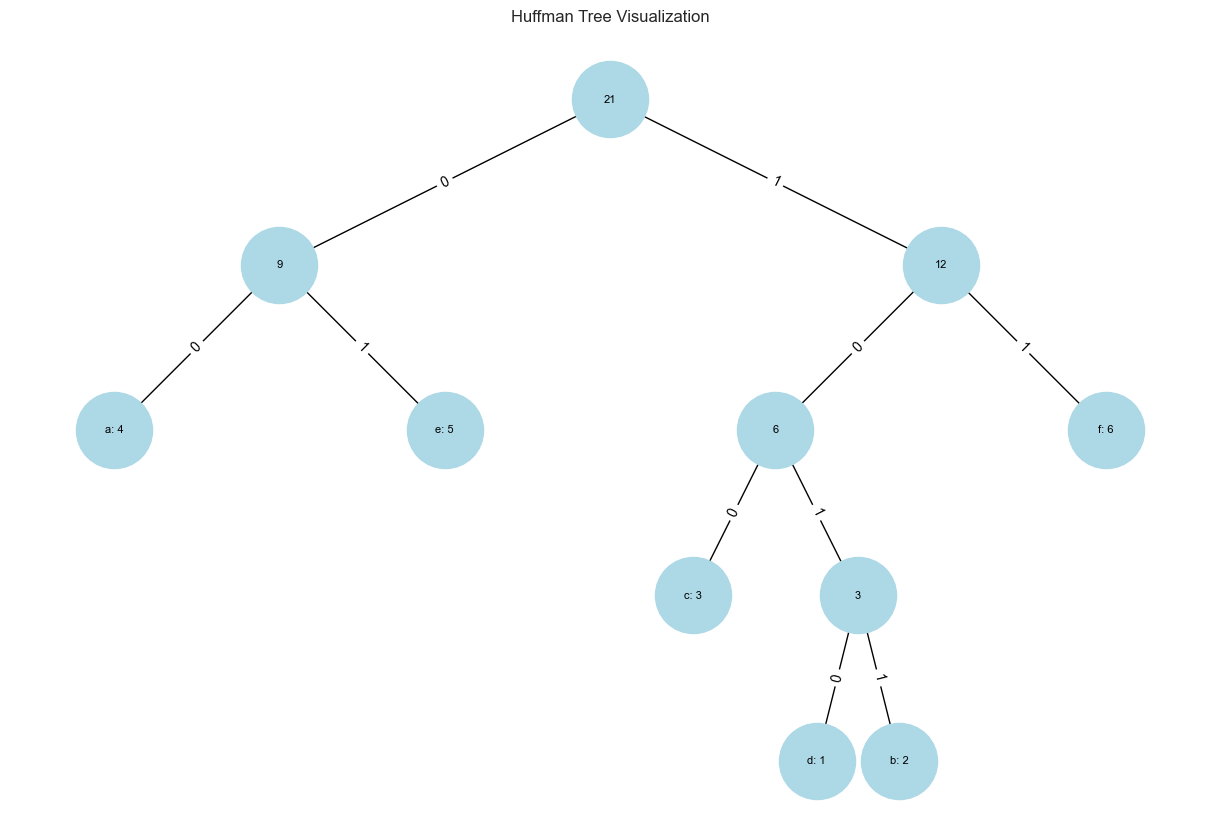

In [6]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

class HuffmanNode:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None
    
    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(text):
    frequency = {}
    for char in text:
        frequency[char] = frequency.get(char, 0) + 1
    
    heap = [HuffmanNode(char, freq) for char, freq in frequency.items()]
    heapq.heapify(heap)
    
    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = HuffmanNode(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)
    
    return heap[0]

def generate_codes(root, current_code="", codes=None):
    if codes is None:
        codes = {}
    if root is None:
        return
    
    if root.char is not None:
        codes[root.char] = current_code
        return
    
    generate_codes(root.left, current_code + "0", codes)
    generate_codes(root.right, current_code + "1", codes)
    
    return codes

def visualize_huffman_tree(root):
    graph = nx.Graph()
    
    def add_nodes(node, x, y, level=0):
        if node is None:
            return
        
        node_id = id(node)
        label = f"{node.char}: {node.freq}" if node.char else f"{node.freq}"
        graph.add_node(node_id, pos=(x, y), label=label)
        
        if node.left:
            left_id = id(node.left)
            graph.add_edge(node_id, left_id)
            add_nodes(node.left, x - 1 / (2 ** level), y - 1, level + 1)
        
        if node.right:
            right_id = id(node.right)
            graph.add_edge(node_id, right_id)
            add_nodes(node.right, x + 1 / (2 ** level), y - 1, level + 1)
    
    add_nodes(root, 0, 0)
    
    pos = nx.get_node_attributes(graph, 'pos')
    labels = nx.get_node_attributes(graph, 'label')
    
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=False, node_size=3000, node_color='lightblue')
    nx.draw_networkx_labels(graph, pos, labels, font_size=8)
    
    # Modified edge labels
    edge_labels = {}
    for u, v in graph.edges():
        if graph.nodes[v]['pos'][0] < graph.nodes[u]['pos'][0]:  # Left child
            edge_labels[(u, v)] = '0'
        else:  # Right child
            edge_labels[(u, v)] = '1'
    
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title("Huffman Tree Visualization")
    plt.axis('off')
    plt.show()
    


example_text = "aeebafabacecffcdefeff"
root = build_huffman_tree(example_text)
codes = generate_codes(root)

print("Huffman Codes:")
for char, code in codes.items():
    print(f"{char}: {code}")

visualize_huffman_tree(root)